In [1]:
%%time
import matplotlib
from marss2l.utils import setup_stream_logger
import logging

logger = logging.getLogger(__name__)
setup_stream_logger(logger)

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

C0 = "#648FFF"
C1 = "#785EF0"
C2 = "#DC267F"
C3 = "#FE6100"
C4 = "#FFB000" # #FFB000

from adlfs import AzureBlobFileSystem
import os

fs = AzureBlobFileSystem(account_name="unepazeconomyadlsstorage")
os.environ["AZURE_STORAGE_ACCOUNT"] = "unepazeconomyadlsstorage"
os.environ["AZURE_STORAGE_ANON"] = "true"
os.makedirs("figures", exist_ok=True)
from marss2l import loaders

dataframe_data_traintest = loaders.read_csv(add_columns_for_analysis=True, fs=fs)
LOCATIONS_CONTROL_RELEASES = ["Standford_controlled_releases", "Standford_controlled_releases_2021"]
dataframe_data_traintest = dataframe_data_traintest[~dataframe_data_traintest.location_name.isin(LOCATIONS_CONTROL_RELEASES)].copy()
dataframe_data_traintest

CPU times: user 17.9 s, sys: 971 ms, total: 18.8 s
Wall time: 28.1 s


,s2path,plumepath,cloudmaskpath,ch4path,location_name_short,wind_u,wind_v,wind_speed,vza,sza,...,footprint,year,year_month,isplumeneg,date,satellite_constellation,year_quarter,ch4_fluxrate_th,interval_ch4_fluxrate,interval_ch4_fluxrate_str
0,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,AGO1,-1.501332,3.022046,3.374428,0.028912,0.041792,...,POLYGON ((11.843518021121666 -5.62795256186787...,2024,2024-06-01,True,2024-06-14,Landsat,2024-2Q,0.0,"(-0.001001, 0.0]","[0, 0]"
1,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,AGO1,-0.797506,4.424365,4.495667,0.007840,0.057152,...,POLYGON ((11.843518021121666 -5.62795256186787...,2024,2024-06-01,True,2024-06-06,Landsat,2024-2Q,0.0,"(-0.001001, 0.0]","[0, 0]"
2,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,AGO1,-0.189384,0.756684,0.780023,0.018912,0.033232,...,POLYGON ((11.843518021121666 -5.62795256186787...,2024,2024-05-01,True,2024-05-21,Landsat,2024-2Q,0.0,"(-0.001001, 0.0]","[0, 0]"
3,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,AGO1,-2.156385,2.697462,3.453447,0.018912,0.053952,...,POLYGON ((11.843518021121666 -5.62795256186787...,2024,2024-05-01,True,2024-05-13,Landsat,2024-2Q,0.0,"(-0.001001, 0.0]","[0, 0]"
4,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,AGO2,-0.748721,4.090577,4.158534,8.087734,35.075199,...,POLYGON ((11.820532442173585 -5.23352199534117...,2024,2024-06-01,True,2024-06-06,Sentinel-2,2024-2Q,0.0,"(-0.001001, 0.0]","[0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54712,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,y,0.505325,-0.610872,0.792792,2.995843,56.985940,...,POLYGON ((-103.4471533991121 32.27683632095831...,2023,2023-12-01,True,2023-12-11,Sentinel-2,2023-4Q,0.0,"(-0.001001, 0.0]","[0, 0]"
54713,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,y,-1.849564,1.823120,2.597047,3.009351,56.369133,...,POLYGON ((-103.4471533991121 32.27683632095831...,2023,2023-12-01,True,2023-12-06,Sentinel-2,2023-4Q,0.0,"(-0.001001, 0.0]","[0, 0]"
54714,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,y,-2.483368,-3.101227,3.972999,0.980000,57.670000,...,POLYGON ((-103.44741954560902 32.2767944939605...,2023,2023-12-01,True,2023-12-05,Landsat,2023-4Q,0.0,"(-0.001001, 0.0]","[0, 0]"
54715,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,az://public/MARS-S2L/dataset_20240730/model_da...,y,-1.838806,-2.353096,2.986347,3.004482,54.666063,...,POLYGON ((-103.4471533991121 32.27683632095831...,2023,2023-11-01,True,2023-11-26,Sentinel-2,2023-4Q,0.0,"(-0.001001, 0.0]","[0, 0]"


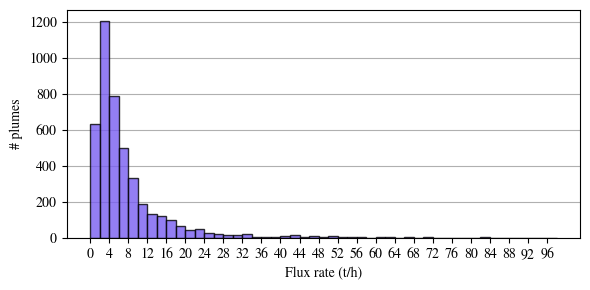

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


fig, ax = plt.subplots(1,1,figsize=(6,3))
ax.hist(dataframe_data_traintest.loc[dataframe_data_traintest.ch4_fluxrate>0, "ch4_fluxrate"], 
         # bins=list(range(0,10_000,500))+list(range(10_000,100_000,5_000)),
         bins=list(range(0,100_000,2000)),
         zorder=2, alpha=0.8, linewidth=1, edgecolor="black",color=C1)
ax.set_xticks(np.arange(0,100_000,4000), [f"{l:.0f}"for l in np.arange(0,100_000,4000)/1000])

ax.set_xlabel("Flux rate (t/h)")
ax.set_ylabel("# plumes")
ax.grid(axis="y")
fig.tight_layout()
fig.savefig("figures/fluxratehist.png")

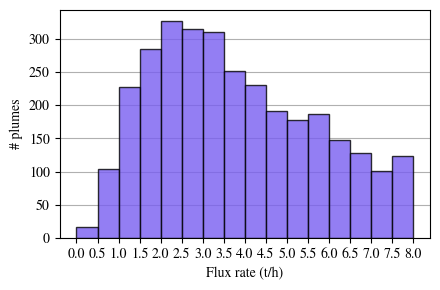

In [3]:
fig, ax = plt.subplots(1,1,figsize=(4.5,3))
ax.hist(dataframe_data_traintest.loc[dataframe_data_traintest.ch4_fluxrate>0, "ch4_fluxrate"], 
         # bins=list(range(0,10_000,500))+list(range(10_000,100_000,5_000)),
         bins=list(range(0,8_500,500)),
         zorder=2, alpha=0.8, linewidth=1, edgecolor="black",color=C1)
ax.set_xticks(np.arange(0,8_500,500), [f"{l:.1f}"for l in np.arange(0,8_500,500)/1000])
ax.set_xlabel("Flux rate (t/h)")
ax.set_ylabel("# plumes")
ax.grid(axis="y")
fig.tight_layout()
fig.savefig("figures/fluxratehist_zoomedin.png")

/tmp/ipykernel_15254/1137027971.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


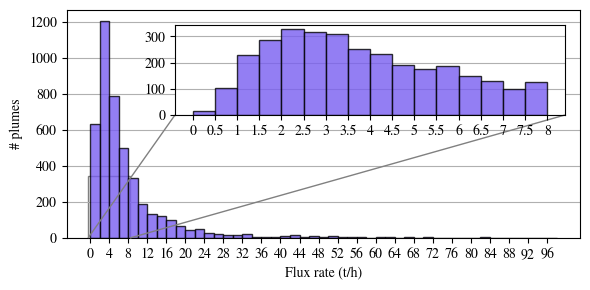

In [4]:
fig, ax = plt.subplots(1,1,figsize=(6,3))
ax.hist(dataframe_data_traintest.loc[dataframe_data_traintest.ch4_fluxrate>0, "ch4_fluxrate"], 
         # bins=list(range(0,10_000,500))+list(range(10_000,100_000,5_000)),
         bins=list(range(0,100_000,2000)),
         zorder=2, alpha=0.8, linewidth=1, edgecolor="black",color=C1)
ax.set_xticks(np.arange(0,100_000,4000), [f"{l:.0f}"for l in np.arange(0,100_000,4000)/1000])
ax.set_xlabel("Flux rate (t/h)")
ax.set_ylabel("# plumes")
ax.grid(axis="y")

# axins = zoomed_inset_axes(ax, 3, loc=1) # zoom = 6
axins = plt.axes([.3, .6, .65, .3])
axins.hist(dataframe_data_traintest.loc[dataframe_data_traintest.ch4_fluxrate>0, "ch4_fluxrate"], 
         # bins=list(range(0,10_000,500))+list(range(10_000,100_000,5_000)),
         bins=list(range(0,8_500,500)),
         zorder=2, alpha=0.8, linewidth=1, edgecolor="black",color=C1)
axins.set_xticks(np.arange(0,8_500,500), [f"{l:.1f}" if f"{l:.1f}"[-1] == "5" else f"{l:.0f}" for l in np.arange(0,8_500,500)/1000])
axins.set_yticks(range(0,400, 100))
# axins.set_xlabel("Flux rate (t/h)")
# axins.set_ylabel("# plumes")
axins.grid(axis="y")

mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")

fig.tight_layout()
fig.savefig("figures/fluxratehist.png")
fig.savefig("figures/fluxratehist.pdf")